In [5]:
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
# définition des fonctions k1, l1, k2, l2 et g
def k1(x, y, G, M):
    return (-G*M*x)/np.power((x**2+y**2), 3/2)

def l1(x, y, G, M):
    return (-G*M*y)/np.power((x**2+y**2), 3/2)

def k2(u, v):
    return u

def l2(u, v):
    return v

In [7]:
# méthode Verlet
def fct_Verlet_2D(x0, y0, x_prime0, y_prime0, tmin, tmax, pas, K, L, G, M):
    """
    Implémente la méthode de Verlet pour un système d'équations différentielles en 2D.

    Arguments :
    - x0, y0, x_prime0, y_prime0 : conditions initiales (valeurs de x et y à t = tmin)
    - tmin : début de l'intervalle de temps
    - tmax : fin de l'intervalle de temps
    - pas : pas de discrétisation
    - K : fonction K(t, x, y) définissant l'équation différentielle d²x/dt² = K
    - L : fonction L(t, x, y) définissant l'équation différentielle d²y/dt² = L

    Retourne :
    - x : tableau des valeurs de x(t)
    - y : tableau des valeurs de y(t)
    - t : tableau des instants de temps
    """
    t = np.arange(tmin,tmax+pas,pas)
    x = np.zeros(len(t))
    x[0] = x0
    y = np.zeros(len(t))
    y[0] = y0

    # Initilisation pour la première valeur
    x[1] = x[0] + x_prime0 * pas + 0.5*K(x[0],y[0], G, M)* pas**2
    y[1] = y[0] + y_prime0 * pas + 0.5*L(x[0],y[0], G, M)* pas**2

    
    for k in range(2,len(t)):
        x[k] = 2*x[k-1] - x[k-2] + K(x[k-1],y[k-1], G, M) * pas**2
        y[k] = 2*y[k-1] - y[k-2] + L(x[k-1],y[k-1], G, M) * pas**2
        
    return x, y, t

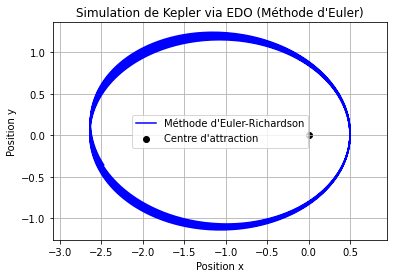

In [ ]:
# paramètres et conditions initiales
from matplotlib import legend


M_soleil = 1
G_temp = 4*(np.pi)**2
t_min = 0.0
t_max = 15
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = 0  # vitesse astre initiale (x)
y_prime0 = 11.5  # vitesse astre initiale (y)
beta_RK = 0.5

u1 = x_prime0 + h*k1(x0,y0, G_temp, M_soleil)
v1 = y_prime0 + h*l1(x0,y0, G_temp, M_soleil)
x1 = x0 + h*k2(x_prime0,y_prime0)
y1 = y0 + h*l2(x_prime0,y_prime0)


# méthode d'Euler-Richardson
xVerlet, yVerlet, t = fct_Verlet_2D(x0, y0, x_prime0, y_prime0, t_min, t_max, h, k1, l1, G_temp, M_soleil)

# méthode de Runge-Kutta d'ordre 2, conditions initiales différentes
t_min = 0.0
t_max = 15.0
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = -2.1  # vitesse astre initiale (x)
y_prime0 = 15.5  # vitesse astre initiale (y)

# Tracer les trajectoires
plt.figure()
plt.plot(xVerlet, yVerlet, label="Méthode de Verlet", linestyle="-", color="b")
# Ajouter le centre d'attraction (astre central)
plt.scatter(0, 0, color="black", marker="o", label="Centre d'attraction")

# Labels et légende
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Kepler via EDO (Méthode de Verlet)")
plt.legend()
plt.grid()
plt.axis("equal")  # Pour conserver les proportions réelles

plt.show()